In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [9]:
# Step 2: Load all sheets from Excel and combine
excel_file = pd.read_excel('C:/Users/DuminduS/Desktop/UWE/IGP/Project/data sets/All_Cleaned_D1.xlsx', sheet_name=None)
df_all = pd.concat(excel_file.values(), ignore_index=True)

In [11]:
# Step 3: Select numeric features
numeric_df = df_all.select_dtypes(include='number')
print(numeric_df.columns.tolist())

['ID', 'What is your year of birth (Just the year, e.g. 1995) ?', 'How do you describe yourself? - Selected Choice', 'What is your first degree subject area?', 'How many years work experience do you have?', 'CW2', 'CW3', 'CW4', 'CC1 [FA] (100)', 'Overall Result', 'Q14 What is your year of birth (Just the year, e.g. 1995) ?', 'Student_ID', 'Student Activity by Day in hours Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Total_Items', 'Total_Logins', 'Student Activity by Item in the Course total time spent in hours Assignments', 'Learning_Materials_Time', 'Module_Info_Time', 'Reading_List_Time', 'Time_accessed_week 1', 'Time_accessed_week 2', 'Number of Times Accessed Assignments', 'Time_accessed_Learning_Materials', 'Time_accessed_Module Information (Handbook)', 'Time_accessed_Reading_list', 'Time_accessed_week_1', 'Time_accessed_week1', 'Initial_Learning_Materials', 'Initial_Module_Info', 'Initial_Reading_List', 'Initial_Week_1', 'Unnamed: 26 Week 1', 'Num

In [13]:
# Step 4: Scale the numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_df)

In [15]:
# Step 5: Handle missing values (fill with mean)
scaled_df = pd.DataFrame(X_scaled, columns=numeric_df.columns)
scaled_df_cleaned = scaled_df.fillna(scaled_df.mean(numeric_only=True))

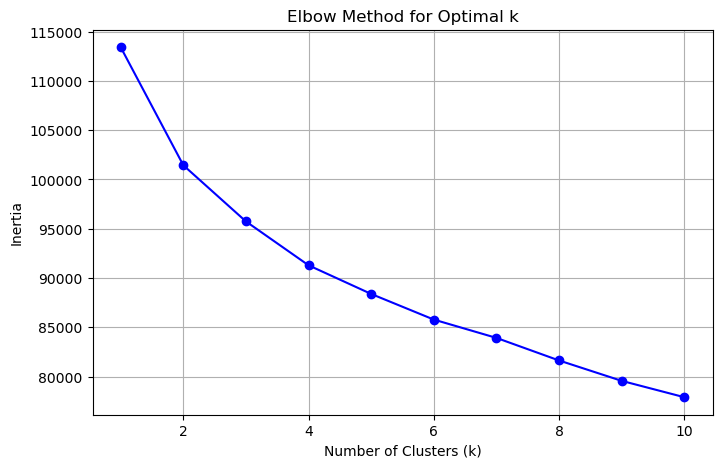

In [17]:
# Step 6: Find optimal k (Elbow Method)
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_df_cleaned)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


In [19]:
# Step 7: Apply KMeans with chosen k (e.g., k = 4)
k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(scaled_df_cleaned)

In [21]:
# Step 8: Add cluster labels to original dataframe
df_all['Cluster'] = cluster_labels

In [23]:
# Step 9: Optional - PCA for 2D Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_df_cleaned)
df_all['PCA1'] = X_pca[:, 0]
df_all['PCA2'] = X_pca[:, 1]

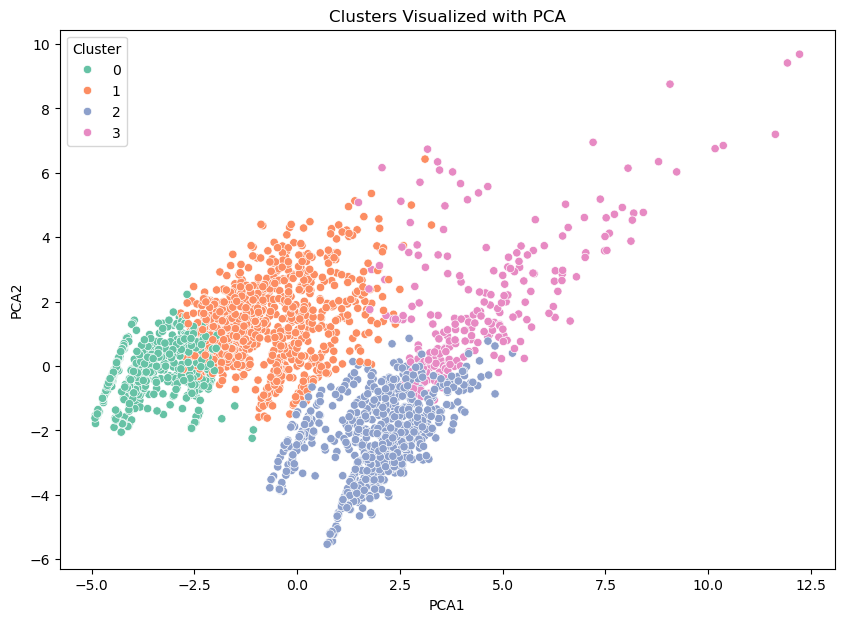

In [25]:
# Step 10: Visualize clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_all, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title("Clusters Visualized with PCA")
plt.show()

In [27]:
# Step 11: Optional - Export results
df_all.to_excel('clustered_results.xlsx', index=False)